# Bureau of Transportation Statistics

### Airline On-Time Statistics and Delay Causes

# Data Cleaning and Exploratory Data Analysis

----

## 1. Data: https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E
#### Duration: 2013 to 2020


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle
import calendar
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 30)

In [2]:
# Load data file
df = pd.read_csv('airline_delay.csv')
df.head(2)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2009,11,AS,Alaska Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",88.0,11.0,1.99,0.0,9.01,0.0,0.0,0.0,0.0,266.0,65.0,0.0,201.0,0.0,0.0,NaN
1,2009,11,AS,Alaska Airlines Inc.,DEN,"Denver, CO: Denver International",123.0,5.0,3.47,0.0,1.53,0.0,0.0,0.0,0.0,81.0,57.0,0.0,24.0,0.0,0.0,NaN


In [3]:
## Removing extra space from the name of the features

df.rename(columns={' month':'month', ' weather_ct':'weather_ct', ' arr_delay':'arr_delay', ' carrier_delay':'carrier_delay'}, inplace=True)

In [4]:
## Get date feature from the year and month columns. Drop the irrelevant feature that has only null values (Unnamed: 21)

df['year_month'] = df.apply(lambda x: datetime(x['year'], x['month'], 1), axis =1)
df.sort_values(by = 'year_month', ascending=True, inplace = True)
df.set_index(keys='year_month', drop = True, inplace=True)
df.drop(columns='Unnamed: 21', inplace = True)
# df.info()

In [6]:
# Check for the missing data
df_missing_data = df[df.isna().any(axis=1)]
df_missing_data.shape

(71, 21)

In [7]:
# Check if all the values are missing or just one or 2 columns

df_missing_data.arr_flights.isna().value_counts()

True     42
False    29
Name: arr_flights, dtype: int64

#### 42 records have null in all the columns, and 29 records have missing values in some columns.
We can remove the rows where all the rows are missing. We will check the cases where some of the values are missing.


In [8]:
df_missing_data.head(2)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year_month,,,,,,,,,,,,,,,,,,,,,
2003-09-01,2003,9,RU,ExpressJet Airlines Inc.,TPA,"Tampa, FL: Tampa International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,2004,2,TZ,ATA Airlines d/b/a ATA,TPA,"Tampa, FL: Tampa International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_missing_data.iloc[65:67]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year_month,,,,,,,,,,,,,,,,,,,,,
2020-05-01,2020,5,G4,Allegiant Air,SAN,"San Diego, CA: San Diego International",17.0,NaN,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-01,2020,5,G4,Allegiant Air,BOS,"Boston, MA: Logan International",28.0,NaN,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### These are the cases where some of the values are there, but these are the cases where either all the flights got cancelled or diverted.
These rows have very less information in them(for our analysis), so we can remove them.

In [10]:
# Drop missing values

df.dropna(inplace=True)

In [11]:
# Check for duplicate data entries

df.duplicated().sum()

0

In [12]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000
mean,2011.188483,6.576894,994.259606,191.557594,46.935397,6.170249,74.565059,0.430687,63.456257,18.667072,2.306252,11339.752879,3060.529715,528.189234,3593.917909,17.302181,4139.806887
std,5.081828,3.446720,1855.244965,362.768908,80.798703,16.566612,162.986690,1.406470,135.453333,69.366322,7.277573,23124.803113,6160.159482,1505.819654,9062.820901,63.395679,8987.968516
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,4.000000,124.000000,24.000000,7.520000,0.000000,7.750000,0.000000,4.360000,0.000000,0.000000,1218.000000,375.000000,0.000000,289.000000,0.000000,247.000000
50%,2011.000000,7.000000,331.000000,68.000000,19.930000,1.400000,23.900000,0.000000,15.760000,3.000000,0.000000,3582.000000,1080.000000,91.000000,952.000000,0.000000,997.000000
75%,2016.000000,10.000000,867.000000,175.000000,48.420000,5.400000,66.060000,0.090000,51.335000,12.000000,2.000000,9932.000000,2837.000000,425.000000,2880.000000,4.000000,3431.000000
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,641.540000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


#### By looking at the quatrile values, the data looks right skewed. We will examine this in the visualizations

In [13]:
df.describe(include='object')

,carrier,carrier_name,airport,airport_name
count,73211,73211,73211,73211
unique,28,32,30,30
top,DL,Delta Air Lines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County"
freq,6289,6289,2806,2806


#### There is a difference between the counts of carrier and carrier_name. 

The reason is some of the carriers have gone through organizational and business change and being taken over by some other companies. 



In [14]:
carrier_mapping = df.groupby(['carrier', 'carrier_name'], sort=True).size().to_frame('count').reset_index()
carrier_mapping.head(4)

,carrier,carrier_name,count
0,9E,Endeavor Air Inc.,700
1,9E,Pinnacle Airlines Inc.,823
2,AA,American Airlines Inc.,6159
3,AQ,Aloha Airlines Inc.,69


> 9E, DH, EV, MQ, and OH are getting repeated under different names

> ExpressJet Airlines Inc. has three different carrier codes (EV, RU, and XE) 

> This is because over the time both code and name of airline may change due to different reasons such as merger between airlines, or rebranding of airlines

> https://www.transtats.bts.gov/Tables.asp?QO_VQ=EFD&QO_anzr=Nv4yv0r%FDb0-gvzr%FDcr4s14zn0pr%FDQn6n&QO_fu146_anzr=b0-gvzr

### Checking Top Airlines and Airports

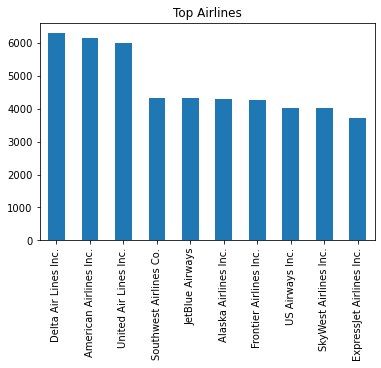

In [15]:
df.carrier_name.value_counts().head(10).plot(kind = 'bar').set_title('Top Airlines')
plt.show()

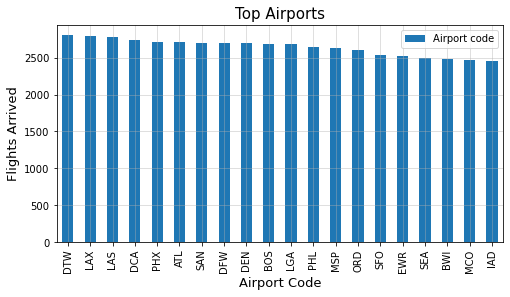

In [16]:
plt.figure(figsize=(8, 4))

df.airport.value_counts().head(20).plot(kind = 'bar')

plt.xlabel('Airport Code', fontsize = 13)
plt.ylabel('Flights Arrived', fontsize = 13)
plt.title('Top Airports', fontsize = 15)
plt.legend(['Airport code'])
plt.grid(alpha = 0.5)
plt.savefig("visualizations/00_Top_Carriers.png", dpi=100)

In [17]:
df.airport.unique()

array(['SLC', 'SEA', 'SAN', 'PHX', 'PDX', 'MSP', 'LAX', 'LAS', 'IAH',
       'DFW', 'DEN', 'TPA', 'SFO', 'PHL', 'ATL', 'BOS', 'ORD', 'MIA',
       'MDW', 'LGA', 'IAD', 'EWR', 'DTW', 'DCA', 'CLT', 'BWI', 'JFK',
       'MCO', 'HNL', 'FLL'], dtype=object)

## 2. Analysis of carrier and carrier_name

In [18]:
## Group by year, and carrier code. To see the cumulative monthly data as per Carrier code

df_group_yc = df.groupby(by=['year_month', 'carrier']).sum().reset_index()
df_group_yc.set_index(keys='year_month', drop = True, inplace = True)
df_group_yc.shape

(3530, 18)

In [19]:
## Group by year, and carrier name. To see the cumulative monthly data as per Carrier Name

df_group_yc_name = df.groupby(by=['year_month', 'carrier_name']).sum().reset_index()
df_group_yc_name.set_index(keys='year_month', drop = True, inplace = True)
df_group_yc_name.shape

(3530, 18)

In [20]:
df_group_yc.head(2)

,carrier,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year_month,,,,,,,,,,,,,,,,,,
2003-06-01,AA,60090,180,43418.0,8246.0,1846.02,608.23,3995.74,57.20,1738.84,340.0,124.0,433507.0,119663.0,39976.0,165304.0,2094.0,106470.0
2003-06-01,AS,30045,90,8084.0,1348.0,405.64,5.46,390.75,32.83,513.31,93.0,10.0,59534.0,22670.0,301.0,11414.0,1071.0,24078.0


In [21]:
df_group_yc_name.head(2)

,carrier_name,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year_month,,,,,,,,,,,,,,,,,,
2003-06-01,ATA Airlines d/b/a ATA,38057,114,4681.0,694.0,152.52,9.96,360.30,10.15,161.05,33.0,1.0,32414.0,8637.0,837.0,13353.0,320.0,9267.0
2003-06-01,AirTran Airways Corporation,30045,90,9207.0,1979.0,264.20,63.02,899.59,0.00,752.21,44.0,16.0,101244.0,14010.0,3586.0,38999.0,0.0,44649.0


#### 1. US Airways(US) and America West(HP) got merged in 2005, later in 2006 they started reporting together under the name of US Airways

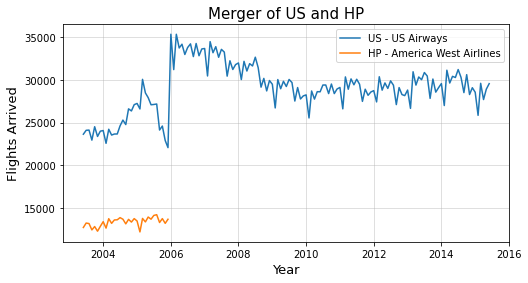

In [22]:
## Plotting US airways and America west Airlines

plt.figure(figsize=(8, 4))
plt.plot(df_group_yc[df_group_yc['carrier'] == 'US']['arr_flights'], label='US - US Airways')
plt.plot(df_group_yc[df_group_yc['carrier'] == 'HP']['arr_flights'], label = 'HP - America West Airlines')
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Flights Arrived', fontsize = 13)
plt.title('Merger of US and HP', fontsize = 15)
plt.legend()
plt.grid(alpha = 0.5)
plt.savefig("visualizations/01_us_hp_merger_2005.png", dpi=100)

#### 2. Sharp rise in the year 2006 can be explained by the merger. Another interesting point is that the data is there until 2016. This means that either US Airways discontinued its service in the end of 2015 or it has been merged with another airline.

On digging deeper, it has been found that US Airways got merged with American Airlines in 2013. And from 2015 they started to report jointly.

Reference: https://simpleflying.com/american-airlines-us-airways-merger/#:~:text=American%20Airlines%20and%20US%20Airways,largest%20airline%20at%20the%20time

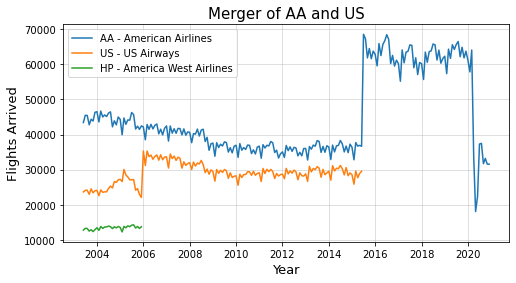

In [23]:
## Plotting AA and US

plt.figure(figsize=(8, 4))
plt.plot(df_group_yc[df_group_yc['carrier'] == 'AA']['arr_flights'], label='AA - American Airlines')
plt.plot(df_group_yc[df_group_yc['carrier'] == 'US']['arr_flights'], label='US - US Airways')
plt.plot(df_group_yc[df_group_yc['carrier'] == 'HP']['arr_flights'], label = 'HP - America West Airlines')

plt.xlabel('Year', fontsize = 13)
plt.ylabel('Flights Arrived', fontsize = 13)
plt.title('Merger of AA and US', fontsize = 15)
plt.legend()
plt.grid(alpha = 0.5)
plt.savefig("visualizations/02_aa_us_merger_2013.png", dpi=100)

> This plot gives the full picture of HP, US, and AA from 2003 to 2020. As these are essentially the same, we can combine their count for combined delay analysis. So the renaming of the codes - US and HP to AA can be done.



#### 3. United and Continental began reporting jointly in January 2012 following their 2010 merger announcement. So, CO can be renamed to UA for further analysis.

<< -- Point 3, 4, 5, 6, and 7 are similar to the above case, so removed the visualizations to save space -->>

Reference:
https://www.transtats.bts.gov/Tables.asp?QO_VQ=EFD&QO_anzr=Nv4yv0r%FDb0-gvzr%FDcr4s14zn0pr%FDQn6n&QO_fu146_anzr=b0-gvzr

#### 4. Atlantic Southeast and ExpressJet began reporting jointly in January 2012.


> After 2019, ExpressJet became a LLC company. 

RU and XE can also be combined to EV for analysis.

Reference: 
https://en.wikipedia.org/wiki/ExpressJet

#### 5. Southwest (WN) and AirTran (FL) began reporting jointly in January 2015 following their 2011 merger announcement.

Rename FL with WN

#### 6. Alaska Airlines (AS) and Virgin America (VX) began reporting jointly as AS in April 2018 following their 2016 merger announcement. 

Rename VX with AS


#### 7. Delta and Northwest began reporting jointly in January 2010 following their 2008 merger announcement. 
Rename NW with DL

#### 8. Endeavor (9E) operated as Pinnacle prior to August 2013.

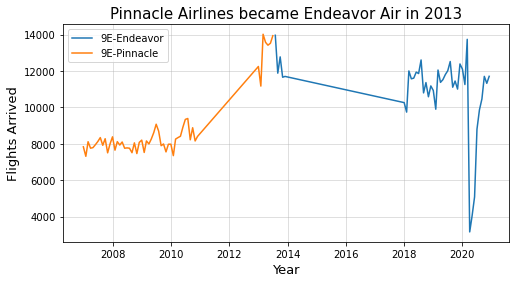

In [24]:
## Plotting Endeaver and Pinnacle

plt.figure(figsize=(8, 4))
plt.plot(df_group_yc_name[df_group_yc_name['carrier_name'] == 'Endeavor Air Inc.']['arr_flights'], label='9E-Endeavor')
plt.plot(df_group_yc_name[df_group_yc_name['carrier_name'] == 'Pinnacle Airlines Inc.']['arr_flights'], label = '9E-Pinnacle')

plt.xlabel('Year', fontsize = 13)
plt.ylabel('Flights Arrived', fontsize = 13)
plt.title('Pinnacle Airlines became Endeavor Air in 2013', fontsize = 15)
plt.legend()
plt.grid(alpha = 0.5)
plt.savefig("visualizations/07_9E_2013.png", dpi=100)

> No action needed here, because we are considering carrier codes for analysis. And it is already 6E. From the scatter plot above it has been found that the Airline might have become unoperational between 2011 and 2013, and 2013 to 2018. In 2012, parent company of Pinnacle Airlines filed for bankruptcy. Because of which the operations were suspended between 2011 and 2013. And on May 01, 2012, has been reorganized and renamed to Endeavor Air. 

#### 9. Envoy (MQ) operated as American Eagle prior to April 2014.

<<-- Similar to previous case, so removed to save space -->>

## 3. Data cleaning


#### Rename flights that were merged with another airline, so as to get a consistent analysis. Otherwise the airlines those were merged becomes non-existent after merger and the sudden jump can also be explained by the company in which it is merged.

In [25]:
##Creating a copy so that original dataframe can be used later 
df_clean = df.copy()

In [26]:
def rename_carrier_codes(old_val):
    '''
    This method renames the carrier codes which were merged or rebranded with other carrier codes
    
    '''
    
    if old_val == 'HP' or old_val == 'US':
        return 'AA'
    elif old_val == 'RU' or old_val == 'XE':
        return 'EV'
    elif old_val == 'CO':
        return 'UA'
    elif old_val == 'FL':
        return 'WN'
    elif old_val == 'VX':
        return 'AS'
    elif old_val == 'NW':
        return 'DL'
    else:
        return old_val
    

df_clean['carrier'] = df_clean['carrier'].apply(lambda x: rename_carrier_codes(x))

In [27]:
count_before_renaming = len(df.carrier.value_counts())
count_after_renaming = len(df_clean.carrier.value_counts())

print('Count of carrier codes before renaming: ', count_before_renaming)
print('Count of carrier codes after renaming: ', count_after_renaming)

Count of carrier codes before renaming:  28
Count of carrier codes after renaming:  20


In [28]:
## Group by year, and carrier code

df_clean_group_yc = df_clean.groupby(by=['year_month', 'carrier']).sum().reset_index()
df_clean_group_yc.set_index(keys='year_month', drop = True, inplace = True)
df_clean_group_yc.shape

(2855, 18)

In [29]:
## Group by year, and carrier name

df_clean_group_yc_name = df_clean.groupby(by=['year_month', 'carrier_name']).sum().reset_index()
df_clean_group_yc_name.set_index(keys='year_month', drop = True, inplace = True)
df_clean_group_yc_name.shape

(3530, 18)

#### Checking top airlines after incorporating Merging and Re-branding

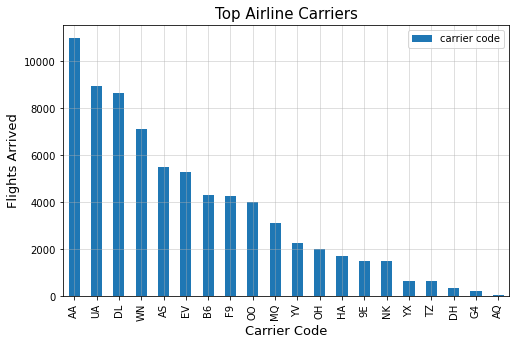

In [30]:
plt.figure(figsize=(8, 5))

df_clean.carrier.value_counts().plot(kind = 'bar')

plt.xlabel('Carrier Code', fontsize = 13)
plt.ylabel('Flights Arrived', fontsize = 13)
plt.title('Top Airline Carriers', fontsize = 15)
plt.legend(['carrier code'])
plt.grid(alpha = 0.5)
plt.savefig("visualizations/13_Top_Carriers.png", dpi=100)

In [31]:
carrier_mapping = df_clean.groupby(['carrier', 'carrier_name'], sort=True).size().to_frame('count').reset_index()
#carrier_mapping.head(2)

#### Comparing merger in Line Chart
Same effect is seen in all the merger cases, Plotting just one to save space.

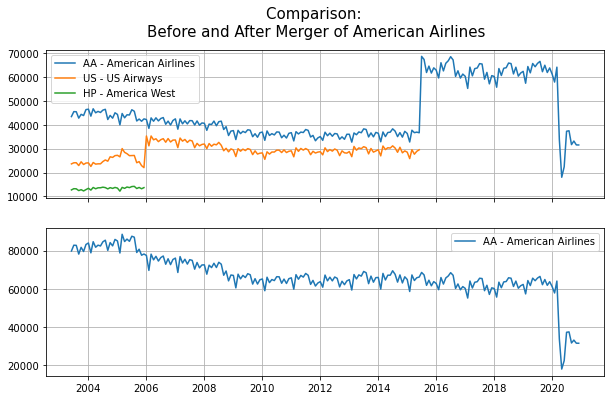

In [32]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex = True)

ax1.plot(df_group_yc[df_group_yc['carrier'] == 'AA']['arr_flights'], label='AA - American Airlines')
ax1.plot(df_group_yc[df_group_yc['carrier'] == 'US']['arr_flights'], label='US - US Airways')
ax1.plot(df_group_yc[df_group_yc['carrier'] == 'HP']['arr_flights'], label = 'HP - America West')
ax2.plot(df_clean_group_yc[df_clean_group_yc['carrier'] == 'AA']['arr_flights'], label='AA - American Airlines')

ax1.legend()
ax2.legend()
ax1.grid()
ax2.grid()
  
    
fig.suptitle('Comparison: \nBefore and After Merger of American Airlines', fontsize=15)
plt.show()

In [33]:
## Clean carrier codes

carrier_mapping_clean = df_clean.groupby(['carrier', 'carrier_name']).size().reset_index()
carrier_codes_clean = carrier_mapping_clean.carrier.unique()
carrier_codes_clean

array(['9E', 'AA', 'AQ', 'AS', 'B6', 'DH', 'DL', 'EV', 'F9', 'G4', 'HA',
       'MQ', 'NK', 'OH', 'OO', 'TZ', 'UA', 'WN', 'YV', 'YX'], dtype=object)

## 4. Exploratory Data Analysis

In [34]:
df_clean.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000
mean,2011.188483,6.576894,994.259606,191.557594,46.935397,6.170249,74.565059,0.430687,63.456257,18.667072,2.306252,11339.752879,3060.529715,528.189234,3593.917909,17.302181,4139.806887
std,5.081828,3.446720,1855.244965,362.768908,80.798703,16.566612,162.986690,1.406470,135.453333,69.366322,7.277573,23124.803113,6160.159482,1505.819654,9062.820901,63.395679,8987.968516
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,4.000000,124.000000,24.000000,7.520000,0.000000,7.750000,0.000000,4.360000,0.000000,0.000000,1218.000000,375.000000,0.000000,289.000000,0.000000,247.000000
50%,2011.000000,7.000000,331.000000,68.000000,19.930000,1.400000,23.900000,0.000000,15.760000,3.000000,0.000000,3582.000000,1080.000000,91.000000,952.000000,0.000000,997.000000
75%,2016.000000,10.000000,867.000000,175.000000,48.420000,5.400000,66.060000,0.090000,51.335000,12.000000,2.000000,9932.000000,2837.000000,425.000000,2880.000000,4.000000,3431.000000
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,641.540000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


#### From the statistics above, we can see that the data is highly skewed. 

for example: arr_flights: 75% of the data comes under 867. But the maximum value is 21,977. This also suggests that most of the times the airports have less than or equal to 867 arrivals from a carrier in a month. Our boxplot will suggest a lot of outliers, but it could also be due to peak vaccation seasons such as summer or christmas holidays. It will become more clear in timeseries plot.

#### Plotting Histogram and Boxplot below:

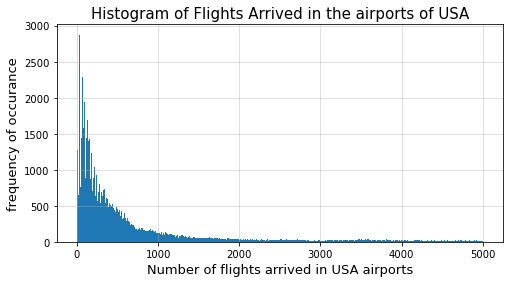

In [35]:
## Histogram
n_bins = 500
plt.figure(figsize=(8, 4))
plt.hist(df_clean['arr_flights'], bins=n_bins, range=(0, 5000))

plt.title('Histogram of Flights Arrived in the airports of USA', fontsize = 15)
plt.xlabel('Number of flights arrived in USA airports', fontsize = 13)
plt.ylabel('frequency of occurance', fontsize = 13)
plt.grid(alpha = 0.5)
plt.savefig("visualizations/18_hist_arrived_flights.png", dpi=100)

#### Histogram is highly skewed, plotting histogram in log scale to see the distribution.

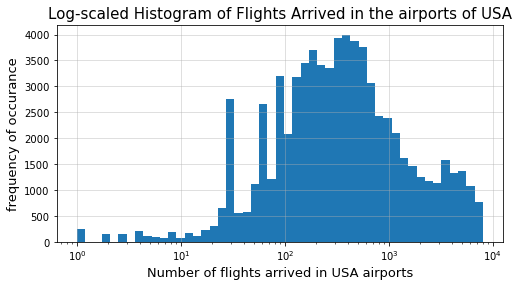

In [36]:
n_bins = 500
plt.figure(figsize=(8, 4))

plt.hist(df_clean['arr_flights'], bins=np.logspace(start = np.log10(1), stop = np.log10(8000)))
plt.gca().set_xscale('log')
plt.title('Log-scaled Histogram of Flights Arrived in the airports of USA', fontsize = 15)
plt.xlabel('Number of flights arrived in USA airports', fontsize = 13)
plt.ylabel('frequency of occurance', fontsize = 13)
plt.grid(alpha = 0.5)
plt.savefig("visualizations/18_loghist_arrived_flights.png", dpi=100)



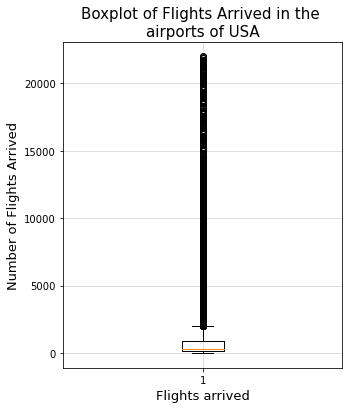

In [37]:
## Boxplot

plt.figure(figsize=(5, 6))
plt.boxplot(df_clean['arr_flights'])

plt.xlabel('Flights arrived', fontsize = 13)
plt.ylabel('Number of Flights Arrived', fontsize = 13)
plt.title('Boxplot of Flights Arrived in the \nairports of USA', fontsize = 15)
plt.grid(alpha = 0.5)
plt.savefig("visualizations/19_box_arrived_flights.png", dpi=100)

#### As expected, due to skewness we have lots of outliers. Lets check the outliers, but before that group the data on monthly basis. 

#### Grouping the data on monthly basis, will give us the better picture of the data. This is because some carriers have more flights running in a month, and somedays it flighs less aircrafts. But if we group data for an airport for a month to look for a Birds-Eye view, it should seems fine.

## Delay in Airports, Reason

In [38]:
## 1. Group data by date -->> overview of congestion in airports combined in USA (broader picture)
## 2. Group data by date, airport -->> overview of congestion in airports
## 3. Group data by date, airport, carrier

In [39]:
## 1. Group data by date -->> overview of congestion in airports combined in USA (broader picture)

df_clean_grouped = df.groupby('year_month').sum()
df_clean_grouped.head(2)

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year_month,,,,,,,,,,,,,,,,,
2003-06-01,685026,2052,333348.0,55349.0,12273.32,2380.35,25876.01,317.28,14502.16,2488.0,707.0,2651919.0,683450.0,157535.0,1007474.0,14398.0,789062.0
2003-07-01,691035,2415,347438.0,63943.0,14442.74,2959.11,28233.83,220.37,18087.00,4891.0,852.0,3626491.0,859521.0,237501.0,1366362.0,5794.0,1157313.0


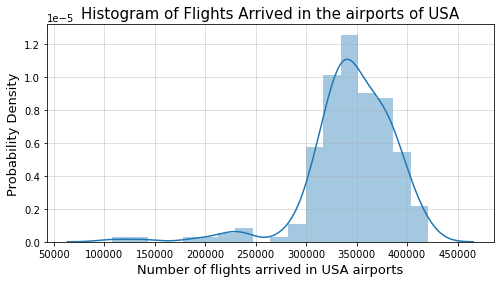

In [40]:
## Check hiistogram of monthly flights and their probability distribution

n_bins = 18
plt.figure(figsize=(8, 4))
sns.distplot(df_clean_grouped['arr_flights'], bins=n_bins)

plt.title('Histogram of Flights Arrived in the airports of USA', fontsize = 15)
plt.xlabel('Number of flights arrived in USA airports', fontsize = 13)
plt.ylabel('Probability Density', fontsize = 13)
plt.grid(alpha = 0.5)
plt.savefig("visualizations/20_hist_arrived_flights_monthly.png", dpi=100)

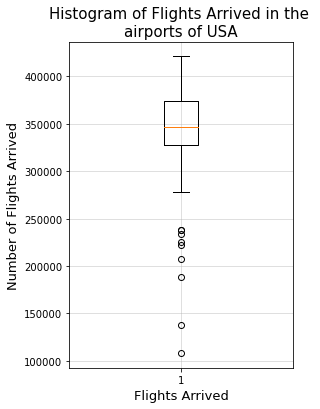

In [41]:
plt.figure(figsize=(4, 6))
plt.boxplot(df_clean_grouped['arr_flights'])

plt.title('Histogram of Flights Arrived in the \nairports of USA', fontsize = 15)
plt.xlabel('Flights Arrived', fontsize = 13)
plt.ylabel('Number of Flights Arrived', fontsize = 13)
plt.grid(alpha = 0.5)
plt.savefig("visualizations/21_box_arrived_flights_monthly.png", dpi=100)

In [42]:
## These could be the real outliers, Lets check them

In [43]:
df_clean_grouped[df_clean_grouped['arr_flights'] < 250000].shape

(9, 17)

In [44]:
df_clean_grouped[df_clean_grouped['arr_flights'] < 250000]

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year_month,,,,,,,,,,,,,,,,,
2020-04-01,593880,1176,188638.0,5635.0,2913.07,145.56,1671.05,13.65,891.66,74699.0,76.0,379901.0,255620.0,14022.0,51064.0,471.0,58724.0
2020-05-01,597920,1480,108181.0,4295.0,2015.46,223.22,1294.67,21.54,740.01,4365.0,131.0,276987.0,155482.0,15259.0,46256.0,1443.0,58547.0
2020-06-01,575700,1710,138034.0,8554.0,3679.79,572.18,2699.41,29.62,1573.03,402.0,211.0,509572.0,254767.0,42516.0,94376.0,1206.0,116707.0
2020-07-01,620140,2149,222087.0,18269.0,7090.41,1314.35,6162.14,98.94,3603.20,1856.0,574.0,1190826.0,539604.0,96157.0,247766.0,5398.0,301901.0
2020-08-01,610040,2416,237764.0,17956.0,6684.63,1366.56,6385.54,100.42,3417.79,2233.0,550.0,1083771.0,487315.0,102381.0,241018.0,3730.0,248818.0
2020-09-01,626200,2790,207524.0,12502.0,5344.52,714.31,3972.22,98.64,2372.34,963.0,299.0,775493.0,387971.0,64400.0,149082.0,3940.0,170100.0
2020-10-01,622160,3080,225668.0,18615.0,6915.03,892.00,7028.80,111.88,3667.41,910.0,324.0,1141255.0,518688.0,81226.0,241031.0,4260.0,296050.0
2020-11-01,622160,3388,233275.0,17218.0,6756.23,576.73,6431.59,90.34,3363.24,1360.0,288.0,1008964.0,495941.0,52022.0,199575.0,3391.0,258035.0
2020-12-01,652460,3876,238124.0,27771.0,10205.71,1044.65,10960.86,108.87,5451.01,2509.0,248.0,1696219.0,752683.0,135607.0,405402.0,4122.0,398405.0


#### These are the cases from Covid-19 Pandemic. Lets plot the timeseries

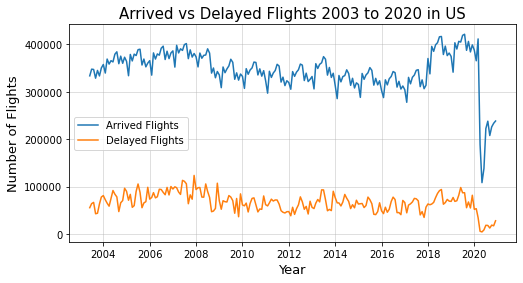

In [45]:
plt.figure(figsize=(8, 4))
plt.plot(df_clean_grouped['arr_flights'], label = 'Arrived Flights')
plt.plot(df_clean_grouped['arr_del15'], label = 'Delayed Flights')

plt.xlabel('Year', fontsize = 13)
plt.ylabel('Number of Flights', fontsize = 13)
plt.title('Arrived vs Delayed Flights 2003 to 2020 in US', fontsize = 15)
plt.legend()
plt.grid(alpha = 0.5)
plt.savefig("visualizations/21_full_arrived_delayed_with_2020.png", dpi=100)

The data from April 2020 to December 2020 came out to be outlier in boxplot. This is a real outlier because of travel restrictions that were placed to control the Covid-19 pandemic. 

To combat the spread of the coronavirus and to protect the U.S. labor market the U.S. government had increasingly taken measures and imposed a ban on entry into the United States from January 31, 2020 until November 7, 2021.

**Reference:** https://en.usvisaservice.de/us-visa-news/article/us-travel-ban-coronavirus/

**We should remove this data (year 2020) from our analysis otherwise it will have a significant bias in the results.**

In [46]:
## Saving the full clean-data into another dataframe for future use
df_clean_grouped_until_2020 = df_clean_grouped.copy()
pickle.dump(df_clean_grouped_until_2020, open('pickles/df_clean_grouped_until_2020.pkl', 'wb'))

In [47]:
print('Shape of df_clean before outlier removal "covid 19 period": ', df_clean.shape)
print('Shape of df_clean_grouped before outlier removal "covid 19 period": ', df_clean_grouped.shape)

Shape of df_clean before outlier removal "covid 19 period":  (73211, 21)
Shape of df_clean_grouped before outlier removal "covid 19 period":  (211, 17)


In [48]:
df_clean_grouped = df_clean_grouped[df_clean_grouped.index < '2020-01-01']
df_clean = df_clean[df_clean.index < '2020-01-01']

In [49]:
print('Shape of df_clean after outlier removal "covid 19 period": ', df_clean.shape)
print('Shape of df_clean_grouped after outlier removal "covid 19 period": ', df_clean_grouped.shape)

Shape of df_clean after outlier removal "covid 19 period":  (69460, 21)
Shape of df_clean_grouped after outlier removal "covid 19 period":  (199, 17)


In [50]:
df_clean_grouped.tail(2)

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year_month,,,,,,,,,,,,,,,,,
2019-11-01,688479,3751,383760.0,54769.0,14894.85,1044.91,19835.46,129.35,18864.38,2774.0,468.0,3559180.0,1188130.0,149763.0,874018.0,5531.0,1341738.0
2019-12-01,696555,4140,398658.0,81605.0,21063.58,1923.14,28925.42,178.33,29514.60,3551.0,698.0,5702436.0,1661206.0,236430.0,1524971.0,6706.0,2273123.0


#### Histogram of all other features, after removing outliers

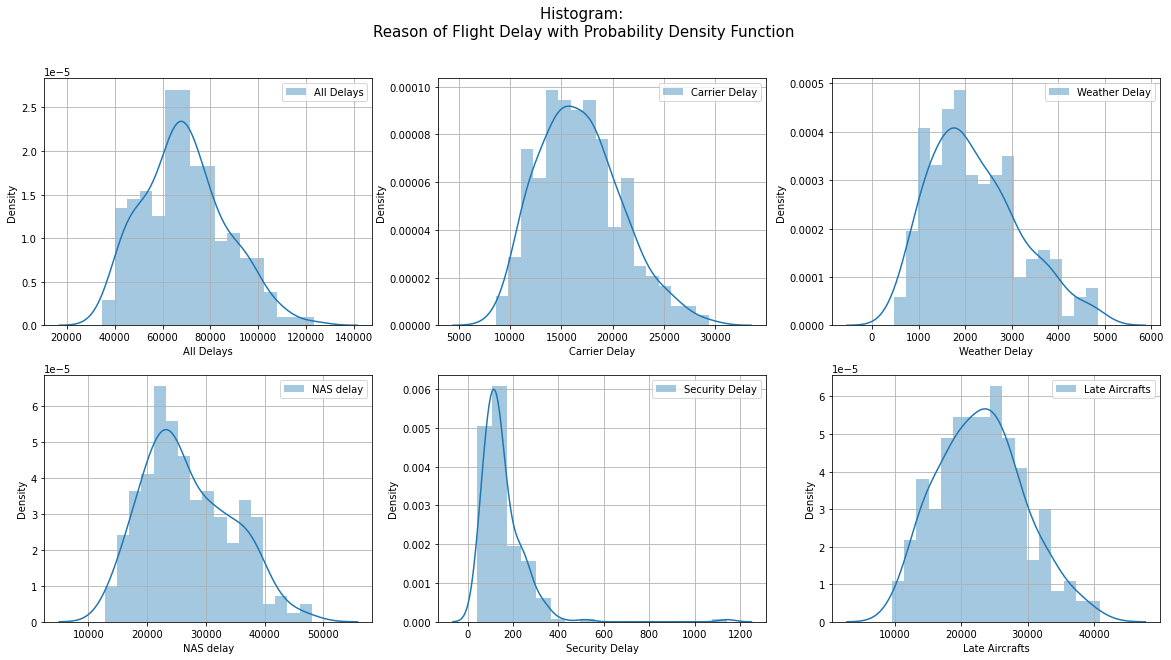

In [51]:
n_bins = 17
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.distplot(df_clean_grouped['arr_del15'], bins=n_bins, ax=axes[0][0], axlabel='All Delays', label = 'All Delays')
sns.distplot(df_clean_grouped['carrier_ct'], bins=n_bins, ax=axes[0][1], axlabel = 'Carrier Delay', label = 'Carrier Delay')
sns.distplot(df_clean_grouped['weather_ct'], bins=n_bins, ax=axes[0][2], axlabel = 'Weather Delay', label = 'Weather Delay')

sns.distplot(df_clean_grouped['nas_ct'], bins=n_bins, ax=axes[1][0], axlabel = 'NAS delay', label = 'NAS delay')
sns.distplot(df_clean_grouped['security_ct'], bins=n_bins, ax=axes[1][1], axlabel = 'Security Delay', label = 'Security Delay')
sns.distplot(df_clean_grouped['late_aircraft_ct'], bins=n_bins, ax=axes[1][2], axlabel = 'Late Aircrafts', label = 'Late Aircrafts')

#plt.title('Histogram of Flights Arrived in the airports of USA')
#plt.xlabel('Number of Delays in USA airports')
#plt.ylabel('frequency of occurance')
for x, y, z in axes:
    x.legend()
    y.legend()
    z.legend()
    x.grid()
    y.grid()
    z.grid()
    
    
fig.suptitle('Histogram: \nReason of Flight Delay with Probability Density Function', fontsize=15)
plt.savefig("visualizations/22_hist_arrived_flight_delays.png", dpi=100)

> The histograms are close to the Gaussian Distribution having slight skewness to the right side. But roughly these could be seen as closer to Gaussian distribution.

#### Comparison of Cancelled and Diverted flights. And Comparison of Delay Counts and Delay Minutes

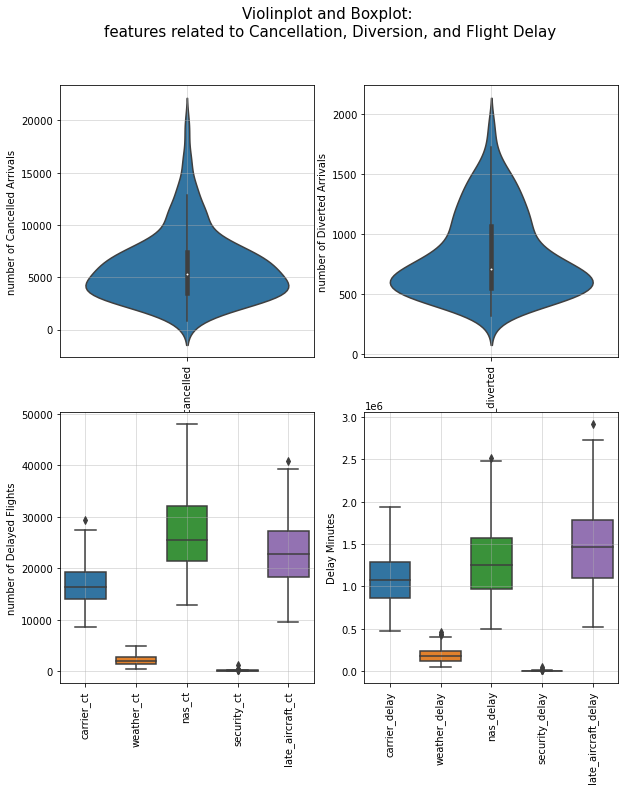

In [52]:
#plt.figure(figsize = (6, 8))
fig, axes = plt.subplots(2, 2, figsize=(10, 11))

sns.violinplot(data=df_clean_grouped[['arr_cancelled']], ax=axes[0][0])
axes[0][0].set_ylabel('number of Cancelled Arrivals')
sns.violinplot(data=df_clean_grouped[['arr_diverted']], ax=axes[0][1])
axes[0][1].set_ylabel('number of Diverted Arrivals')
sns.boxplot(data=df_clean_grouped[['carrier_ct', 'weather_ct', 'nas_ct','security_ct', 'late_aircraft_ct']], ax=axes[1][0])
axes[1][0].set_ylabel('number of Delayed Flights')
sns.boxplot(data=df_clean_grouped[['carrier_delay', 'weather_delay', 'nas_delay','security_delay', 'late_aircraft_delay']], ax=axes[1][1])
axes[1][1].set_ylabel('Delay Minutes')
# sns.boxplot( data=df_clean_grouped[['arr_cancelled']], ax=axes[2][0])
# sns.boxplot(data=df_clean_grouped[['arr_diverted']], ax=axes[2][1])

for ax1, ax2 in axes:
    ax1.tick_params(axis = 'x', rotation = 90)
    ax1.grid(alpha = 0.5)    
    ax2.tick_params(axis = 'x', rotation = 90)
    ax2.grid(alpha = 0.5)
    
fig.suptitle('Violinplot and Boxplot: \nfeatures related to Cancellation, Diversion, and Flight Delay', fontsize=15)
plt.savefig("visualizations/23_violin_box_delays.png", dpi=100)

> We can see from the boxplot that the Counts and Minuutes are almost similar in box plots. But Delay in NAS counts have more contribution than NAS minutes. This suggests that the delay time by Airport Authorities is comparatively less.

In [53]:
# Calculation of Upper and Lower outlier thresholds

percentile_25_carrier_ct = df_clean_grouped['carrier_ct'].quantile(0.25)
percentile_75_carrier_ct = df_clean_grouped['carrier_ct'].quantile(0.75)

iqr_carrier_ct = percentile_75_carrier_ct - percentile_25_carrier_ct

upper_whisker_carrier_ct = percentile_75_carrier_ct + 1.25 * iqr_carrier_ct
lower_whisker_carrier_ct = percentile_25_carrier_ct - 1.25 * iqr_carrier_ct

print('Value of upper limit of carrier_ct is: ', upper_whisker_carrier_ct)

Value of upper limit of carrier_ct is:  26089.46624999999


In [54]:
df_clean_grouped[df_clean_grouped['carrier_ct'] > upper_whisker_carrier_ct]

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year_month,,,,,,,,,,,,,,,,,
2007-06-01,834912,2496,386967.0,112977.0,27383.45,4813.31,42090.34,342.57,38347.35,11151.0,1724.0,7318480.0,1714441.0,433757.0,2467955.0,12120.0,2690207.0
2007-07-01,822870,2870,399187.0,111000.0,27250.55,4624.12,39583.88,342.24,39199.36,8764.0,1635.0,6859982.0,1668861.0,387060.0,2123259.0,12167.0,2668635.0
2007-12-01,830898,4968,380475.0,123390.0,29377.18,4700.76,48036.79,338.71,40936.46,13380.0,738.0,7233610.0,1747765.0,407726.0,2410854.0,11452.0,2655813.0


In [55]:
print('Value of lower limit of carrier_ct is: ', lower_whisker_carrier_ct)

Value of lower limit of carrier_ct is:  7236.768750000012


In [56]:
df_clean_grouped['carrier_ct'].describe()

count      199.000000
mean     16806.719749
std       3997.942991
min       8590.210000
25%      13969.875000
50%      16405.090000
75%      19356.360000
max      29377.180000
Name: carrier_ct, dtype: float64

> These three data points are outlier as per the boxplot. But the values are realistic and is not very far from the other data points. So this value should be kept for the analysis. 

> Similarly other values of the outliers should also be kept. Because these are not the wrong or noisy values. If we remove them, we might miss out some critical information in our analysis.

> Comparing NAS delays with Late Aircraft delays. NAS delays are more in count, but is less than late aircraft delay when compared with corresponding delay times.

## Checking Correlation amongst the features. Calculate Spearman Correlation 

In [57]:
df_clean_corr_monthly = df_clean_grouped.drop(columns = ['year', 'month'])

In [104]:
spear_corr_monthly = df_clean_corr_monthly.corr(method='spearman')

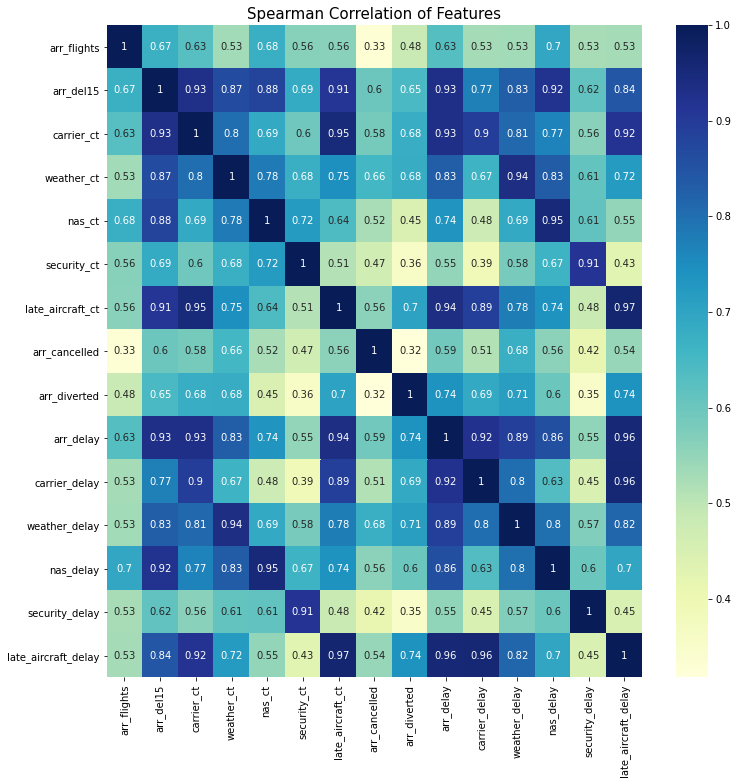

In [59]:
plt.figure(figsize = (12, 12))
plt.title('Spearman Correlation of Features', fontsize = 15)
sns.heatmap(spear_corr_monthly, annot = True, cmap="YlGnBu")
plt.savefig("visualizations/24_sp_corr_features.png", dpi=100)

> The correlation between counts and minutes are greater than 89%. This is because they share causal relationship. For example: Weather count and Weather Delay minutes are correlated by 93.7%. Weather minutes are a cause of weather count.

> So in further analysis, we focus mainly on the counts

### EDA - Time Series


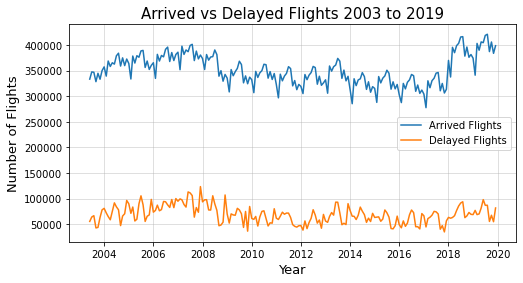

In [60]:
plt.figure(figsize=(8, 4))
plt.plot(df_clean_grouped['arr_flights'], label = 'Arrived Flights')
plt.plot(df_clean_grouped['arr_del15'], label = 'Delayed Flights')

plt.xlabel('Year', fontsize = 13)
plt.ylabel('Number of Flights', fontsize = 13)
plt.title('Arrived vs Delayed Flights 2003 to 2019', fontsize = 15)
plt.legend()
plt.grid(alpha = 0.5)
plt.savefig("visualizations/25_full_arrived_delayed.png", dpi=100)

#### Plot 2 year data for better visibility

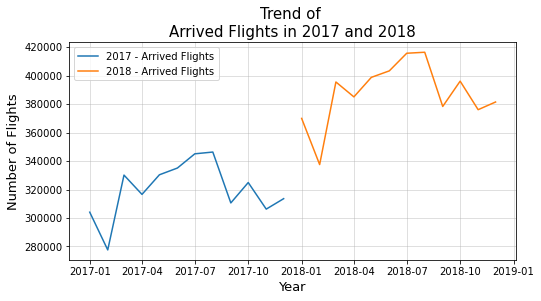

In [61]:
plt.figure(figsize=(8, 4))
plt.plot(df_clean_grouped['2017']['arr_flights'], label = '2017 - Arrived Flights')
plt.plot(df_clean_grouped['2018']['arr_flights'], label = '2018 - Arrived Flights')

plt.xlabel('Year', fontsize = 13)
plt.ylabel('Number of Flights', fontsize = 13)
plt.title('Trend of \nArrived Flights in 2017 and 2018', fontsize = 15)
plt.legend()
plt.grid(alpha = 0.5)
plt.savefig("visualizations/27_2017_2018_arrived.png", dpi=100)

#### Plotting Delay reasons

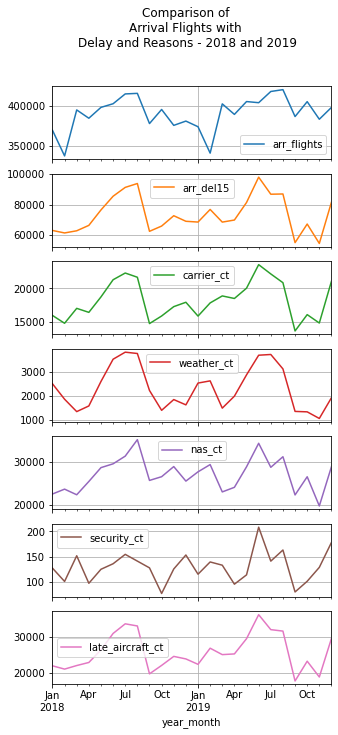

In [62]:
_cols = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

df_clean_grouped['2018':'2019'][_cols].plot(subplots = True, figsize=(5,11), grid = True, 
                                            title = 'Comparison of \nArrival Flights with \nDelay and Reasons - 2018 and 2019')
plt.savefig("visualizations/26_2018_2019_arrived_delayed.png", dpi=100)

> The factors of delay also follows the same trend as of Arrival and Delays

>From above 2 plots we can graphically see a seasonality in our data

## Calculating correlation between these two timeseries features using percentage change

As we can see that all the features (Dealy reasons) in itself is a timeseries. So calculating correlation between Timeseries using Percentage change

In [63]:
# 1. Calculate percent change on all the series, 
# because the values of these series have a large difference and obey some pattern along time

pct_change_columns = ['arr_fl_pct_change', 'arr_dl_pct_change','carr_ct_pct_chng','weather_ct_pct_chng',
                      'nas_ct_pct_chng','security_ct_pct_chng','late_ct_pct_chng','arr_cncld_pct_chng','arr_div_pct_chng']

cols_to_calculate = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 
                     'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']


df_clean_grouped[pct_change_columns] = df_clean_grouped[cols_to_calculate].pct_change()
df_clean_grouped.head()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_fl_pct_change,arr_dl_pct_change,carr_ct_pct_chng,weather_ct_pct_chng,nas_ct_pct_chng,security_ct_pct_chng,late_ct_pct_chng,arr_cncld_pct_chng,arr_div_pct_chng
year_month,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-06-01,685026,2052,333348.0,55349.0,12273.32,2380.35,25876.01,317.28,14502.16,2488.0,707.0,2651919.0,683450.0,157535.0,1007474.0,14398.0,789062.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-01,691035,2415,347438.0,63943.0,14442.74,2959.11,28233.83,220.37,18087.00,4891.0,852.0,3626491.0,859521.0,237501.0,1366362.0,5794.0,1157313.0,0.042268,0.155269,0.176759,0.243141,0.091120,-0.305440,0.247194,0.965836,0.205092
2003-08-01,695041,2776,346804.0,66535.0,14642.02,3355.56,30405.41,243.34,17888.67,5981.0,1143.0,3821624.0,889334.0,264152.0,1508030.0,8688.0,1151420.0,-0.001825,0.040536,0.013798,0.133976,0.076914,0.104234,-0.010965,0.222858,0.341549
2003-09-01,689032,3096,328397.0,42596.0,8590.21,1315.64,23058.61,67.37,9564.11,5192.0,507.0,2101848.0,477374.0,94076.0,1005534.0,1903.0,522961.0,-0.053076,-0.359796,-0.413318,-0.607922,-0.241628,-0.723145,-0.465354,-0.131918,-0.556430
2003-10-01,703053,3510,344763.0,43636.0,9779.39,1014.40,22326.69,161.23,10354.33,3264.0,455.0,1982245.0,542328.0,75099.0,813958.0,7122.0,543738.0,0.049836,0.024415,0.138434,-0.228968,-0.031742,1.393202,0.082623,-0.371341,-0.102564


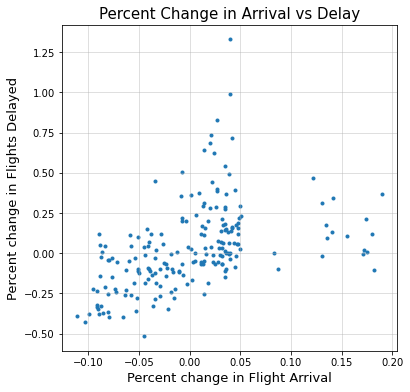

In [64]:
plt.figure(figsize=(6, 6))
plt.scatter(df_clean_grouped['arr_fl_pct_change'], df_clean_grouped['arr_dl_pct_change'], marker = '.')

plt.xlabel('Percent change in Flight Arrival', fontsize = 13)
plt.ylabel('Percent change in Flights Delayed', fontsize = 13)
plt.title('Percent Change in Arrival vs Delay', fontsize = 15)
plt.grid(alpha = 0.5)
plt.savefig("visualizations/28_pct_change_arr_del.png", dpi=100)

#### Plot fitting line using Linear Regression

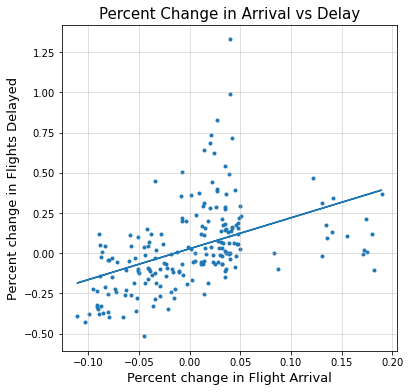

In [65]:
from sklearn.linear_model import LinearRegression

X = df_clean_grouped['arr_fl_pct_change'].values.reshape(-1, 1)
y = df_clean_grouped['arr_dl_pct_change'].values.reshape(-1, 1)

regr_model = LinearRegression().fit(X[1:], y[1:])
m = regr_model.coef_
c = regr_model.intercept_

plt.figure(figsize=(6, 6))
plt.scatter(df_clean_grouped['arr_fl_pct_change'], df_clean_grouped['arr_dl_pct_change'], marker = '.')
plt.plot(X, m*X + c)

plt.xlabel('Percent change in Flight Arrival', fontsize = 13)
plt.ylabel('Percent change in Flights Delayed', fontsize = 13)
plt.title('Percent Change in Arrival vs Delay', fontsize = 15)
plt.grid(alpha = 0.5)
plt.savefig("visualizations/28_regline_pct_change_arr_del.png", dpi=100)

In [66]:
df_clean_grouped[df_clean_grouped['arr_dl_pct_change'] > 0.7
                ][['arr_fl_pct_change', 'arr_dl_pct_change']]

,arr_fl_pct_change,arr_dl_pct_change
year_month,,
2008-12-01,0.040120,0.986836
2009-10-01,0.041600,0.713831
2009-12-01,0.039739,1.328439
2013-12-01,0.026893,0.829370
2016-12-01,0.021128,0.736278


> This suggests that there is substantial increase in delays in the month of December as compared to November in most of the years.

In [67]:
df_clean_grouped[df_clean_grouped['arr_fl_pct_change'] > 0.06
                ][['arr_fl_pct_change', 'arr_dl_pct_change']]


,arr_fl_pct_change,arr_dl_pct_change
year_month,,
2004-03-01,0.086952,-0.098468
2005-03-01,0.134510,0.173378
2006-03-01,0.140122,0.132902
2007-03-01,0.130777,-0.018461
2008-03-01,0.083107,0.003712
2009-03-01,0.141456,0.344187
2010-03-01,0.135581,0.096108
2011-03-01,0.155680,0.108923
2012-03-01,0.122029,0.467906


> This high positive percentage change in the month of March is due to the fact that there is substantial rise in the arrivals in the month of March as compared to February.

### Correlation between % change Arrivals and Delays

In [68]:
corr_arr_del = df_clean_grouped['arr_fl_pct_change'].corr(df_clean_grouped['arr_dl_pct_change'], method='spearman')
corr_arr_del

0.5828133128339745

### Similarly calculating Correlation between other features

In [69]:
df_corr_pct_change = df_clean_grouped[pct_change_columns].corr(method='spearman')

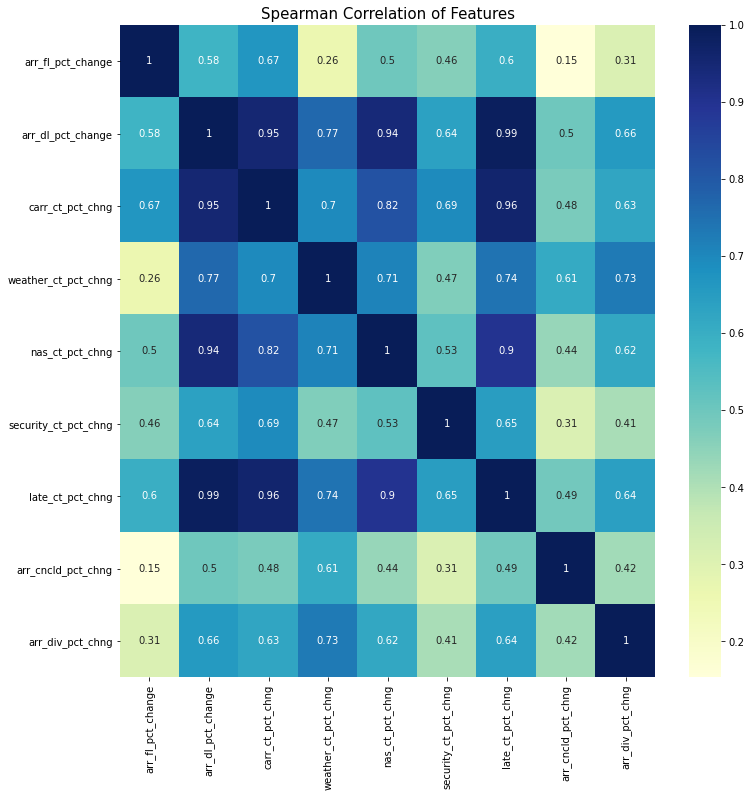

In [70]:
plt.figure(figsize=(12, 12))

sns.heatmap(df_corr_pct_change, annot = True, cmap="YlGnBu")

plt.title('Spearman Correlation of Features', fontsize = 15)
plt.savefig("visualizations/29_sp_corr_pct_change.png", dpi=100)

> Because it considers percent change so more robust in capturing trend.


> NAS and carrier has more counts than other delay reasons, that is the reason of more correlation

#### Auto Correlation

In [71]:
df_clean_grouped['2014':'2019']['arr_flights'].resample('1m').mean().autocorr()

0.808930759284915

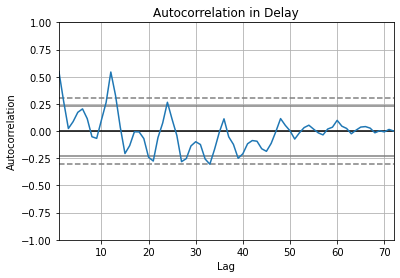

In [72]:
pd.plotting.autocorrelation_plot(df_clean_grouped['2014':'2019']['arr_del15'].resample('1m').mean())
plt.title('Autocorrelation in Delay')
plt.savefig("visualizations/30_delay_autocorrelation.png", dpi=100)

> The high autocorrelation in the data suggests that the past value of the data influences the current value. Dotted lines represent 99% confidence, and horizontal line shows 95% of confidence

> If we look into the lags of 12, 24, 36, 48, we find a peak there. And is symmetrical all over the graph. It says that the data is highly seasonal over the year.

### Monthly Comparison

In [73]:
# 2013 has data from June, so including 2013 data will make the data set disproportionate

df_clean_2014_2019 = df_clean['2004':]


In [74]:
df_clean_monthly_grp = df_clean_2014_2019.groupby(by = 'month').sum()
df_clean_monthly_grp.reset_index(inplace = True)
df_clean_monthly_grp['month'] = df_clean_monthly_grp['month'].apply(lambda x: calendar.month_name[x])
df_clean_monthly_grp.set_index(keys = 'month', inplace = True)
df_clean_monthly_grp

,year,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
month,,,,,,,,,,,,,,,,
January,11273827,5466541.0,1115012.0,272363.46,42952.32,438932.77,2669.36,358094.14,156243.0,10690.0,64987221.0,17640667.0,3646329.0,20386004.0,103378.0,23210843.0
February,11225649,5051506.0,1034558.0,242930.62,36643.56,415678.25,2072.64,337233.60,149928.0,9814.0,59901332.0,15763284.0,3227469.0,19193022.0,83962.0,21633595.0
March,11223705,5779216.0,1131191.0,277089.98,29994.92,438859.12,2525.44,382722.43,107556.0,10505.0,64858048.0,17531351.0,2535956.0,20469630.0,92909.0,24228202.0
April,11201349,5584053.0,1019046.0,246576.46,26804.16,404019.57,1972.52,339673.79,76308.0,11691.0,59494613.0,16113501.0,2354907.0,19162122.0,79432.0,21784651.0
May,11235294,5751915.0,1100599.0,258883.55,34733.08,441412.90,1964.69,363605.37,71392.0,15742.0,65458682.0,16745833.0,3070647.0,21867326.0,74163.0,23700713.0
June,11325860,5784790.0,1363797.0,329221.50,50704.81,501532.40,2634.35,479703.27,98819.0,21631.0,86947951.0,22142325.0,4450233.0,26831034.0,109387.0,33414972.0
July,11221188,5987775.0,1357496.0,337166.78,51100.15,480100.01,2596.26,486533.42,100632.0,21975.0,87822103.0,22792016.0,4406196.0,26388870.0,101425.0,34133596.0
August,11269464,5960972.0,1226729.0,305654.98,42815.75,446585.68,3645.03,428027.50,95633.0,18170.0,75656405.0,20461818.0,3511423.0,22888254.0,153276.0,28641634.0
September,11215082,5444099.0,833824.0,208332.04,23900.70,341944.54,1700.36,257946.63,77690.0,10531.0,47119170.0,13535628.0,1868443.0,15741169.0,82036.0,15891894.0


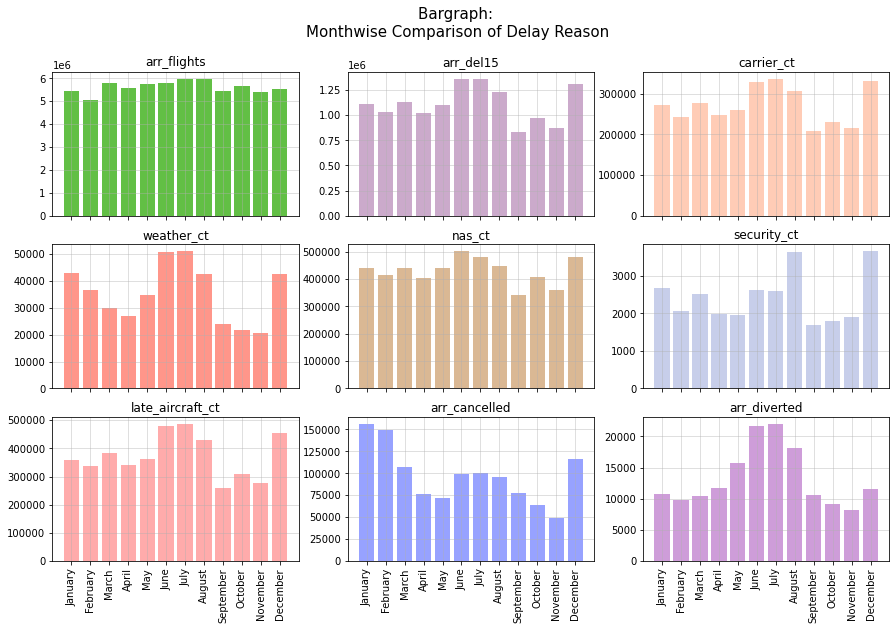

In [75]:
fig, axs = plt.subplots(3, 3, figsize=(15, 9), sharex = 'col')

cols = df_clean_monthly_grp.columns[1:10]
col_index = 0
color_lst = ['#62BF45', '#CBAACB', '#FFCCB6', '#FF968A', '#DAB894', '#C7CEEA', '#FFABAB', '#97A2FF', '#CE9DD9']
for i in range(3):
    for j in range(3):
        #carrier_code = carrier_codes[carrier_index]
        axs[i, j].bar(df_clean_monthly_grp.index, df_clean_monthly_grp[cols[col_index]], label = cols[col_index], color = color_lst[col_index])
        
        axs[i, j].grid(alpha = 0.5)
        #axs[i, j].legend()
        axs[i, j].set_title(cols[col_index])
        axs[i, j].tick_params(labelrotation=90, axis = 'x')
        col_index += 1

fig.suptitle('Bargraph: \nMonthwise Comparison of Delay Reason', fontsize=15)
plt.savefig("visualizations/31_bar_monthly_reason.png", dpi=100)

> More delays in June, July and December. This could be explained by 3 ways
1. These are vacation months (Summer and Winter/Christmas). One of the reason of carrier delay could be uninformed absence of employees. A predictive model could be made using past employee attendance data, so that employee absence could be predicted beforehand and handled accordingly.
2. More Passenger turnout will be there in these vacation months. So it is comparatively more difficult to manage.
3. These are the months of harsh weather conditions, such as in June and July heavy Rains and Strong wind. In december Snow storm etc.

> Effect of Carrier and NAS is the main reason for flight delay because they have the highest counts. And the delays shows chain effect. For example once a flight is delayed, it will be delayed again on next departure

### Yearly Comparison

In [76]:
# converted index to string to get a better plot
df_clean_yearly_grp = df_clean_2014_2019.groupby(by = 'year').sum()
df_clean_yearly_grp.index = df_clean_yearly_grp.index.astype('str')

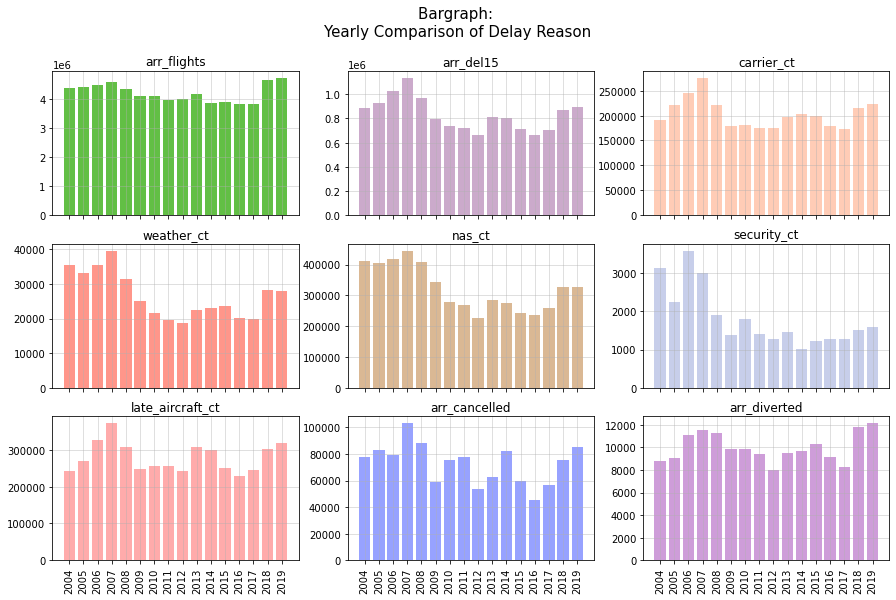

In [77]:
fig, axs = plt.subplots(3, 3, figsize=(15, 9), sharex = 'col')

cols = df_clean_yearly_grp.columns[1:10]
col_index = 0
color_lst = ['#62BF45', '#CBAACB', '#FFCCB6', '#FF968A', '#DAB894', '#C7CEEA', '#FFABAB', '#97A2FF', '#CE9DD9']
for i in range(3):
    for j in range(3):
        #carrier_code = carrier_codes[carrier_index]
        axs[i, j].bar(df_clean_yearly_grp.index, df_clean_yearly_grp[cols[col_index]], label = cols[col_index], color = color_lst[col_index])
        
        axs[i, j].grid(alpha = 0.5)
        #axs[i, j].legend()
        axs[i, j].set_title(cols[col_index])
        axs[i, j].tick_params(labelrotation=90, axis = 'x')
        col_index += 1

fig.suptitle('Bargraph: \nYearly Comparison of Delay Reason', fontsize=15)
plt.savefig("visualizations/32_bar_yearly_reason.png", dpi=100)

> After 2007, the delays tend to reduce. 

> Airport authority have managed to reduce the delays. After the popularity of internet, the web checkin system has made the process smooth and fast. This could be one of the reasons of decreasing NAS delays


### EDA By Airline

In [78]:
df_clean_airline_grp =  df_clean.groupby(['year_month', 'carrier']).sum().reset_index()
df_clean_airline_grp.set_index(keys='year_month', drop = True, inplace=True)

In [79]:
carrier_codes = df_clean_airline_grp.carrier.unique()
carrier_codes

array(['AA', 'AS', 'B6', 'DH', 'DL', 'EV', 'MQ', 'OO', 'TZ', 'UA', 'WN',
       'HA', 'OH', 'F9', 'YV', 'AQ', '9E', 'NK', 'G4', 'YX'], dtype=object)

#### Get most delayed airlines

In [80]:
df_clean_airline_grp_delayed = df_clean_airline_grp[['carrier', 'arr_flights', 'arr_del15']].groupby('carrier').sum().reset_index()

df_clean_airline_grp_delayed.sort_values(by = 'arr_del15', inplace=True, ascending=False, ignore_index=True)
df_clean_airline_grp_delayed.index = df_clean_airline_grp_delayed.carrier
df_clean_airline_grp_delayed.head(4)


,carrier,arr_flights,arr_del15
carrier,,,
AA,AA,13650318.0,2760584.0
WN,WN,11459403.0,2178284.0
DL,DL,11014810.0,1954751.0
UA,UA,9006695.0,1849528.0


<Figure size 864x360 with 0 Axes>

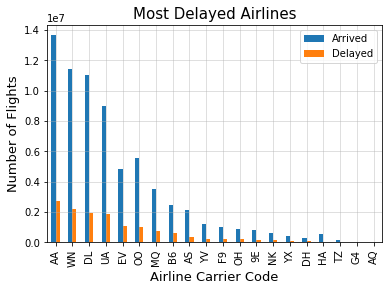

In [81]:
plt.figure(figsize=(12, 5))

df_clean_airline_grp_delayed.head(20).plot(kind = 'bar', )

plt.xlabel('Airline Carrier Code', fontsize = 13)
plt.ylabel('Number of Flights', fontsize = 13)
plt.title('Most Delayed Airlines', fontsize = 15)
plt.legend(['Arrived', 'Delayed'])
plt.grid(alpha = 0.5)
plt.savefig("visualizations/00_Top_Ailines_delayed.png", dpi=100)

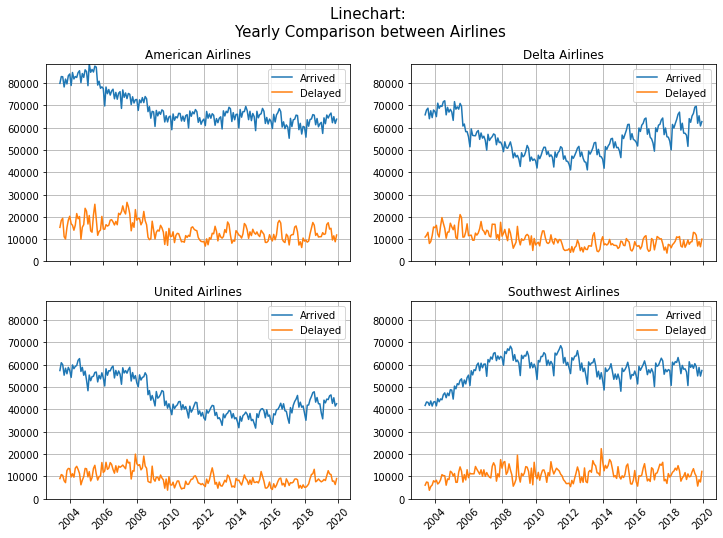

In [82]:
## Comparing top 4 airlines
#  = ['AA', 'UA', 'DL', 'WN']
top_4_carrier= {'AA': 'American Airlines', 'DL':'Delta Airlines', 'UA':'United Airlines', 'WN':'Southwest Airlines' }
top_4_carrier_codes = list(top_4_carrier.keys())
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex = True)

carrier_index = 0
max_y = max(df_clean_airline_grp['arr_flights'].max(),df_clean_airline_grp['arr_del15'].max())
for i in range(2):
    for j in range(2):
        carrier_code = top_4_carrier_codes[carrier_index]
        axs[i, j].plot(df_clean_airline_grp[df_clean_airline_grp['carrier'] == carrier_code]['arr_flights'], label = 'Arrived')
        axs[i, j].plot(df_clean_airline_grp[df_clean_airline_grp['carrier'] == carrier_code]['arr_del15'], label = 'Delayed')
        axs[i, j].set_title(top_4_carrier[carrier_code])
        axs[i, j].legend()
        axs[i, j].grid()
        axs[i, j].tick_params(labelrotation=45, axis = 'x')
        axs[i, j].set_ylim(0, max_y)
        carrier_index+=1

        
#for ax in axs.flat:
#    ax.label_outer()

fig.suptitle('Linechart: \nYearly Comparison between Airlines', fontsize=15)
plt.savefig("visualizations/33_top_4_Arrival_delay_airlines.png", dpi=100)

### EDA by Airports

In [85]:
df_clean_airport_grp =  df_clean.groupby(['year_month', 'airport']).sum().reset_index()
df_clean_airport_grp.set_index(keys='year_month', drop = True, inplace=True)


In [86]:
airports = df_clean_airport_grp.airport.unique()
airports

array(['ATL', 'BOS', 'BWI', 'CLT', 'DCA', 'DEN', 'DFW', 'DTW', 'EWR',
       'FLL', 'HNL', 'IAD', 'IAH', 'JFK', 'LAS', 'LAX', 'LGA', 'MCO',
       'MDW', 'MIA', 'MSP', 'ORD', 'PDX', 'PHL', 'PHX', 'SAN', 'SEA',
       'SFO', 'SLC', 'TPA'], dtype=object)

#### From the above plot, the airports with maximum traffic are:

    1. ATL - Atlanta
    2. DEN - Denver
    3. DFW - Dallas/Fort Worth
    4. LAX - Los Angeles
    5. ORD - Chicago

The maximum delay is seen in Atlanta and Chicago

In [87]:
airport_mapping = df_clean_2014_2019[['airport','airport_name', 'arr_flights', 'arr_del15']].groupby(['airport', 'airport_name']).sum().reset_index()
airport_mapping.sort_values(by = 'arr_flights', inplace=True, ascending=False, ignore_index=True)
airport_mapping.index = airport_mapping.airport
airport_mapping.head(4)

,airport,airport_name,arr_flights,arr_del15
airport,,,,
ATL,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",6380989.0,1222265.0
ORD,ORD,"Chicago, IL: Chicago O'Hare International",5156575.0,1162805.0
DFW,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",4383796.0,804490.0
DEN,DEN,"Denver, CO: Denver International",3606720.0,650982.0


<Figure size 864x360 with 0 Axes>

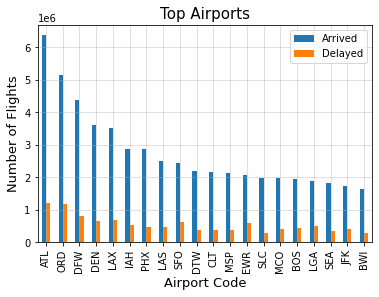

In [88]:
plt.figure(figsize=(12, 5))

airport_mapping.head(20).plot(kind = 'bar', )

plt.xlabel('Airport Code', fontsize = 13)
plt.ylabel('Number of Flights', fontsize = 13)
plt.title('Top Airports', fontsize = 15)
plt.legend(['Arrived', 'Delayed'])
plt.grid(alpha = 0.5)
plt.savefig("visualizations/00_Top_Airports.png", dpi=100)

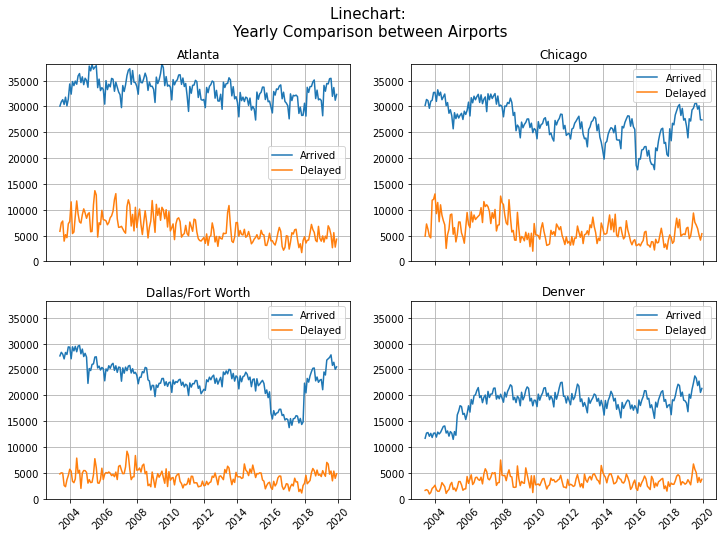

In [89]:
## Comparing top 4 airlines
#  = ['AA', 'UA', 'DL', 'WN']
top_4_airports= {'ATL': 'Atlanta', 'ORD':'Chicago', 'DFW':'Dallas/Fort Worth', 'DEN':'Denver' }
top_4_airport_codes = list(top_4_airports.keys())
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex = True)

_index = 0
max_y = max(df_clean_airport_grp['arr_flights'].max(),df_clean_airport_grp['arr_del15'].max())
for i in range(2):
    for j in range(2):
        airport_code = top_4_airport_codes[_index]
        axs[i, j].plot(df_clean_airport_grp[df_clean_airport_grp['airport'] == airport_code]['arr_flights'], label = 'Arrived')
        axs[i, j].plot(df_clean_airport_grp[df_clean_airport_grp['airport'] == airport_code]['arr_del15'], label = 'Delayed')
        axs[i, j].set_title(top_4_airports[airport_code])
        axs[i, j].legend()
        axs[i, j].grid()
        axs[i, j].tick_params(labelrotation=45, axis = 'x')
        axs[i, j].set_ylim(0, max_y)
        _index+=1

        
#for ax in axs.flat:
#    ax.label_outer()

fig.suptitle('Linechart: \nYearly Comparison between Airports', fontsize=15)
plt.savefig("visualizations/37_top_4_Arrival_delay_airports.png", dpi=100)

> Airports show similar delay trend. We will check for the percentage delays with respect to the delay reasons

## Calculate Proportion of Each of the Delays

> 1. by Year
2. by Month
3. by Airport
4. by Carrier

In [90]:
## 1. by Year

df_clean_yearly_grp = df_clean_yearly_grp[['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled',
       'arr_diverted']]
df_clean_yearly_grp.head(2)

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
year,,,,,,,,,
2004,4380629.0,884743.0,190385.30,35575.36,412320.58,3130.09,243332.62,78032.0,8775.0
2005,4411433.0,930310.0,220625.01,33205.70,403937.32,2245.04,270296.18,83271.0,9029.0


In [91]:
## Method to calculate delay percentage 

def percent_calc(col, col_sum):
    '''
    col: the column for which the percentage needs to be calculated
    col_sum: the sum of all the columns
    '''
    return col*100/col_sum

In [92]:
cols = df_clean_yearly_grp.columns[2:7]

for col in cols:
    df_clean_yearly_grp[col+'_percent'] = df_clean_yearly_grp.apply(lambda x: percent_calc(x[col], x['arr_del15']), axis = 1)


df_clean_yearly_grp.head(2)

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_ct_percent,weather_ct_percent,nas_ct_percent,security_ct_percent,late_aircraft_ct_percent
year,,,,,,,,,,,,,,
2004,4380629.0,884743.0,190385.30,35575.36,412320.58,3130.09,243332.62,78032.0,8775.0,21.518712,4.020982,46.603429,0.353785,27.503198
2005,4411433.0,930310.0,220625.01,33205.70,403937.32,2245.04,270296.18,83271.0,9029.0,23.715214,3.569316,43.419647,0.241322,29.054421


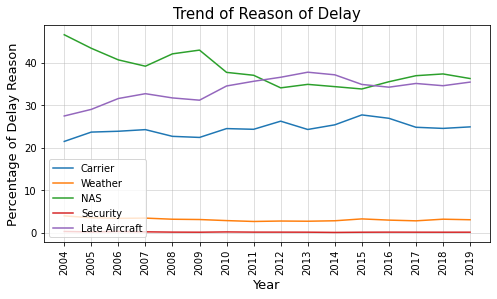

In [93]:
# df_clean_yearly_grp[['carrier_ct_percent', 'weather_ct_percent', 'nas_ct_percent', 'security_ct_percent', 
#                      'late_aircraft_ct_percent']].plot(figsize=(8,4), grid = True)

_cols = ['carrier_ct_percent', 'weather_ct_percent', 'nas_ct_percent', 'security_ct_percent', 'late_aircraft_ct_percent']
plt.figure(figsize=(8, 4))

plt.plot(df_clean_yearly_grp['carrier_ct_percent'], label = 'Carrier')
plt.plot(df_clean_yearly_grp['weather_ct_percent'], label = 'Weather')
plt.plot(df_clean_yearly_grp['nas_ct_percent'], label = 'NAS')
plt.plot(df_clean_yearly_grp['security_ct_percent'], label = 'Security')
plt.plot(df_clean_yearly_grp['late_aircraft_ct_percent'], label = 'Late Aircraft')

plt.xlabel('Year', fontsize = 13)
plt.ylabel('Percentage of Delay Reason', fontsize = 13)
plt.title('Trend of Reason of Delay', fontsize = 15)
plt.xticks(rotation = 90)
plt.legend(loc = 'lower left')
plt.grid(alpha = 0.5)
plt.savefig("visualizations/38_delay_reason_trend.png", dpi=100)

> Over the year, Delays due to Late Aircraft and Carrier has been increased from 25% to 35% and 21% to 25% respectivelly. And delay due to NAS has been decreased from 49.3 to 36.3%.

> Delay due to Security and Weather is more or less constant and is very few as compared to other reasons. 

#### 2. by Month

In [94]:
df_clean_monthly_grp = df_clean_monthly_grp[['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled',
       'arr_diverted']]


In [95]:
cols = df_clean_monthly_grp.columns[2:7]

for col in cols:
    df_clean_monthly_grp[col+'_percent'] = df_clean_monthly_grp.apply(lambda x: percent_calc(x[col], x['arr_del15']), axis = 1)


df_clean_monthly_grp.head(2)

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_ct_percent,weather_ct_percent,nas_ct_percent,security_ct_percent,late_aircraft_ct_percent
month,,,,,,,,,,,,,,
January,5466541.0,1115012.0,272363.46,42952.32,438932.77,2669.36,358094.14,156243.0,10690.0,24.426953,3.852185,39.365744,0.239402,32.115721
February,5051506.0,1034558.0,242930.62,36643.56,415678.25,2072.64,337233.60,149928.0,9814.0,23.481585,3.541953,40.179308,0.200341,32.596877


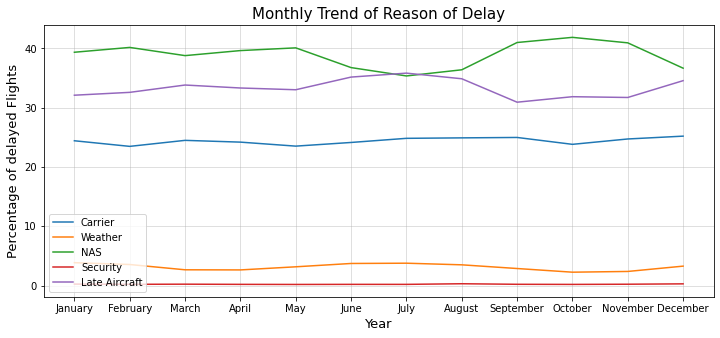

In [96]:
# df_clean_yearly_grp[['carrier_ct_percent', 'weather_ct_percent', 'nas_ct_percent', 'security_ct_percent', 
#                      'late_aircraft_ct_percent']].plot(figsize=(8,4), grid = True)

plt.figure(figsize=(12, 5))

plt.plot(df_clean_monthly_grp['carrier_ct_percent'], label = 'Carrier')
plt.plot(df_clean_monthly_grp['weather_ct_percent'], label = 'Weather')
plt.plot(df_clean_monthly_grp['nas_ct_percent'], label = 'NAS')
plt.plot(df_clean_monthly_grp['security_ct_percent'], label = 'Security')
plt.plot(df_clean_monthly_grp['late_aircraft_ct_percent'], label = 'Late Aircraft')

plt.xlabel('Year', fontsize = 13)
plt.ylabel('Percentage of delayed Flights', fontsize = 13)
plt.title('Monthly Trend of Reason of Delay', fontsize = 15)

plt.legend(loc = 'lower left')
plt.grid(alpha = 0.5)
plt.savefig("visualizations/41_monthly_delay_reason_trend.png", dpi=100)

> The percentage of reason across the months do not show much variation with respect to each other. It shows the relative impact of each factor is constant irrespective of the month

#### 3. by Airport

In [97]:
df_clean_airport_grp = df_clean_airport_grp[['airport', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled',
       'arr_diverted']]


In [98]:
cols = df_clean_airport_grp.columns[3:8]

for col in cols:
    df_clean_airport_grp[col+'_%'] = df_clean_airport_grp.apply(lambda x: percent_calc(x[col], x['arr_del15']), axis = 1)


df_clean_airport_grp.head(2)

,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_ct_%,weather_ct_%,nas_ct_%,security_ct_%,late_aircraft_ct_%
year_month,,,,,,,,,,,,,,,
2003-06-01,ATL,30060.0,5843.0,1009.37,327.23,3215.79,16.47,1274.15,216.0,27.0,17.274859,5.600377,55.036625,0.281876,21.806435
2003-06-01,BOS,9639.0,1623.0,373.98,67.13,683.34,3.49,495.09,138.0,3.0,23.042514,4.136168,42.103512,0.215034,30.504621


> Previously we have identified airports with major proportion of Arrivals and Delays
>1. ATL - Atlanta
2. DEN - Denver
3. DFW - Dallas/Fort Worth
4. ORD - Chicago

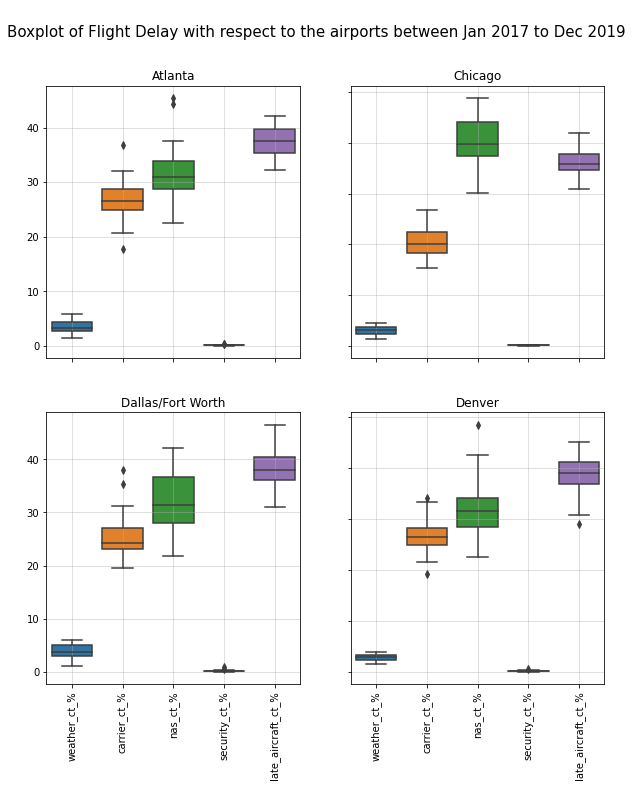

In [99]:
col_percent_list = ['weather_ct_%', 'carrier_ct_%', 'nas_ct_%', 'security_ct_%', 'late_aircraft_ct_%']

fig, axes = plt.subplots(2, 2, figsize=(10, 11))

fig.suptitle('\nBoxplot of Flight Delay with respect to the airports between Jan 2017 to Dec 2019', fontsize=15)
sns.boxplot(data=df_clean_airport_grp[df_clean_airport_grp['airport'] == 'ATL']['2017':'2019'][col_percent_list], ax=axes[0][0]).set_title('Atlanta')
sns.boxplot( data=df_clean_airport_grp[df_clean_airport_grp['airport'] == 'ORD']['2017':'2019'][col_percent_list], ax=axes[0][1]).set_title('Chicago')


sns.boxplot( data=df_clean_airport_grp[df_clean_airport_grp['airport'] == 'DFW']['2017':'2019'][col_percent_list], ax=axes[1][0]).set_title('Dallas/Fort Worth')
sns.boxplot(data=df_clean_airport_grp[df_clean_airport_grp['airport'] == 'DEN']['2017':'2019'][col_percent_list], ax=axes[1][1]).set_title('Denver')

for ax1, ax2 in axes:
    ax1.tick_params(axis = 'x', rotation = 90)
    ax1.grid(alpha = 0.5)    
    ax2.tick_params(axis = 'x', rotation = 90)
    ax2.grid(alpha = 0.5)    
    
    
for ax in axes.flat:
    ax.label_outer()
    
plt.savefig("visualizations/43_Top_4_AirportWise_delay_reason.png", dpi=100)

> Atlanta has more traffic, but Chicago has more delays  

> Chicago has the highest percent of flight delays caused by NAS (approx 50%)

> Reducing NAS delays, will significantly improve traffic management in the airports

>To reduce the delays, the weather forecast should also be included in the model that schedules the flights

>Automating the processes in the airport that needs human intervention such as luggage check-in process, terminals boarding pass etc.

>Make a predictive model that correctly predicts the Gate of departure of flights with more confidence. Last moment gate change can cause delay in boarding activity contributing to delays


#### 4. By Carrier

In [100]:
## Group by year, and carrier code
df_clean_group_yc = df_clean.groupby(by=['year_month', 'carrier']).sum().reset_index()
df_clean_group_yc.set_index(keys='year_month', drop = True, inplace = True)
print(df_clean_group_yc.shape)

(2654, 18)


In [101]:
df_clean_group_yc = df_clean_group_yc[['carrier', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled',
       'arr_diverted']]


In [102]:
cols = df_clean_group_yc.columns[3:8]

for col in cols:
    df_clean_group_yc[col+'_%'] = df_clean_group_yc.apply(lambda x: percent_calc(x[col], x['arr_del15']), axis = 1)


df_clean_group_yc.head(2)

,carrier,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_ct_%,weather_ct_%,nas_ct_%,security_ct_%,late_aircraft_ct_%
year_month,,,,,,,,,,,,,,,
2003-06-01,AA,79802.0,15300.0,3457.92,728.72,7335.36,76.06,3702.01,562.0,184.0,22.600784,4.762876,47.943529,0.497124,24.196144
2003-06-01,AS,8084.0,1348.0,405.64,5.46,390.75,32.83,513.31,93.0,10.0,30.091988,0.405045,28.987389,2.435460,38.079377


1. AA-American Airlines Inc.
2. DL - Delta Airlines
3. UA - United Air Lines Inc.
4. WN - Southwest Airlines Co.

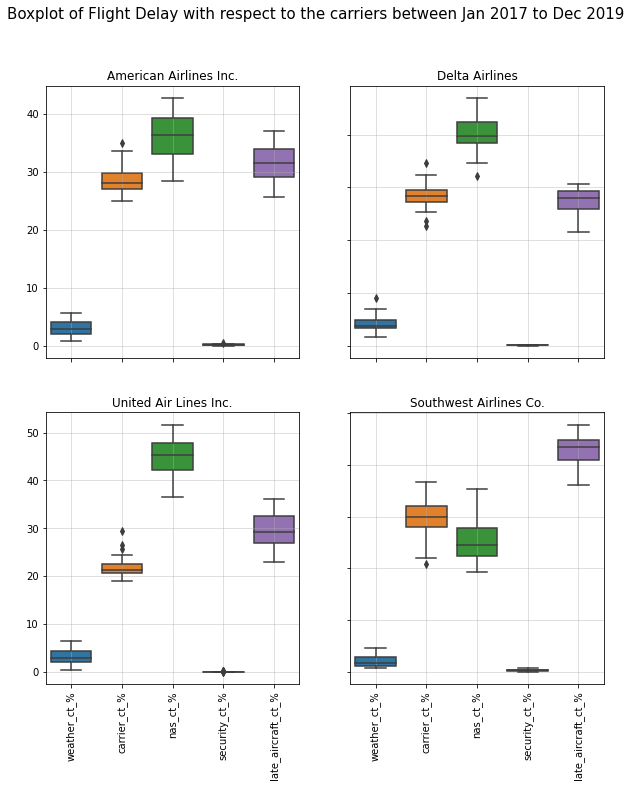

In [103]:
#plt.figure(figsize = (6, 8))
fig, axes = plt.subplots(2, 2, figsize=(10, 11))
fig.suptitle('Boxplot of Flight Delay with respect to the carriers between Jan 2017 to Dec 2019', fontsize=15)

sns.boxplot(data=df_clean_group_yc[df_clean_group_yc['carrier'] == 'AA']['2017':'2019'][col_percent_list], ax=axes[0][0]).set_title('American Airlines Inc.')
sns.boxplot(data=df_clean_group_yc[df_clean_group_yc['carrier'] == 'DL']['2017':'2019'][col_percent_list], ax=axes[0][1]).set_title('Delta Airlines')

sns.boxplot( data=df_clean_group_yc[df_clean_group_yc['carrier'] == 'UA']['2017':'2019'][col_percent_list], ax=axes[1][0]).set_title('United Air Lines Inc.')
sns.boxplot(data=df_clean_group_yc[df_clean_group_yc['carrier'] == 'WN']['2017':'2019'][col_percent_list], ax=axes[1][1]).set_title('Southwest Airlines Co.')

for ax1, ax2 in axes:
    ax1.tick_params(axis = 'x', rotation = 90)
    ax1.grid(alpha = 0.5)    
    ax2.tick_params(axis = 'x', rotation = 90)
    ax2.grid(alpha = 0.5)    
    
    
for ax in axes.flat:
    ax.label_outer()
    
plt.savefig("visualizations/44_carrierwise_delay_reason.png", dpi=100)

>American Airlines has the most number of delays, but by the end of 2019, Southwest Airlines has more delays than American Airlines.

>Southwest Airlines has comparatively lower traffic, but has higher percentage of delays due to carrier (>30%)

>Airlines are struggling with Turn-around process, this should be analysed further to optimize the process[7]. 

>One of the reason of carrier delay could be uninformed absence of employees. A predictive model could be made using past employee attendance data, so that employee absence could be predicted beforehand and handled accordingly.